<a href="https://colab.research.google.com/github/Jaeljane/Attendance_Prediction/blob/main/Attendance_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np

###Data Import

In [47]:
data=pd.read_csv('/Attendance_2.csv', encoding='utf-8')
df=data.copy()
print(df.shape)
df.head()

(21238, 12)


,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,05/10/2023,Thursday,Day,Present,Other Reasons,A001,T001,>24M,Oct,1,NH,Not_assosiated_with_Holiday
1,05/10/2023,Thursday,Day,Present,Other Reasons,A002,T001,12-24M,Oct,1,NH,Not_assosiated_with_Holiday
2,05/10/2023,Thursday,Day,Present,Other Reasons,A003,T002,>24M,Oct,1,NH,Not_assosiated_with_Holiday
3,05/10/2023,Thursday,Day,Present,Other Reasons,A004,T003,>24M,Oct,1,NH,Not_assosiated_with_Holiday
4,05/10/2023,Thursday,Night,Present,Other Reasons,A005,T004,12-24M,Oct,1,NH,Not_assosiated_with_Holiday


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21238 entries, 0 to 21237
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 21238 non-null  object
 1   day                  21237 non-null  object
 2   shift                21238 non-null  object
 3   attendance           21238 non-null  object
 4   Reasons              21238 non-null  object
 5   Employee_Id          21238 non-null  object
 6   Team                 21238 non-null  object
 7   Tenure               21132 non-null  object
 8   Month                21238 non-null  object
 9   Week_Numb            21238 non-null  int64 
 10  Holiday              21238 non-null  object
 11  Holiday_Association  15625 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [49]:
df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')
df.tail()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
21233,2023-02-02,Thursday,Day,Present,Other Reasons,A033,T004,>24M,Feb,1,NH,NaN
21234,2023-02-02,Thursday,Day,Present,Other Reasons,A037,T013,>24M,Feb,1,NH,NaN
21235,2023-02-02,Thursday,Day,Present,Other Reasons,A082,T017,>24M,Feb,1,NH,NaN
21236,2023-02-02,Thursday,Day,Present,Other Reasons,A027,T015,>24M,Feb,1,NH,NaN
21237,2023-02-02,Thursday,Day,Present,Other Reasons,A090,T013,>24M,Feb,1,NH,NaN


###EDA

In [50]:
#we are interested in attendance so our main focus will be on those who were present
df['attendance'].value_counts()

Present        19162
PTO             1283
Absent           720
Unscheduled       73
Name: attendance, dtype: int64

In [51]:
#select data for only those who were present
df_p=df[df['attendance']=="Present"]
df_p.shape

(19162, 12)

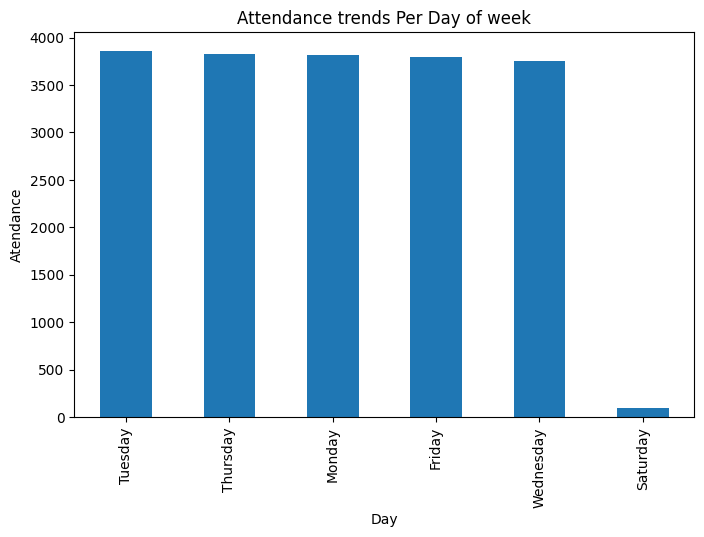

In [52]:
#add shifts
df_p['day'].value_counts().plot(figsize=(8,5),
                                         kind="bar", ylabel="Atendance",
                                         xlabel="Day",
                                         title="Attendance trends Per Day of week" );

In [53]:
#drop Saturdays cause it is overtime
df_p=df_p[df_p['day']!="Saturday"]


In [54]:
#check for holidays
df_p['Holiday'].value_counts()

NH    18715
H       347
Name: Holiday, dtype: int64

In [55]:
#drop holidays because attendance is voluntary
df_p.drop(df_p[df_p['Holiday']=='H'].index, inplace=True)

saturday has the lowest attendance, this might be work done on overtime, we can remove it if skews the data

In [33]:
df_p['shift'].value_counts()

Day      10687
Night     8028
Name: shift, dtype: int64

####Absenteeism

In [34]:
df_a=df[df['attendance']=="Absent"]
df_a.shape

(720, 12)

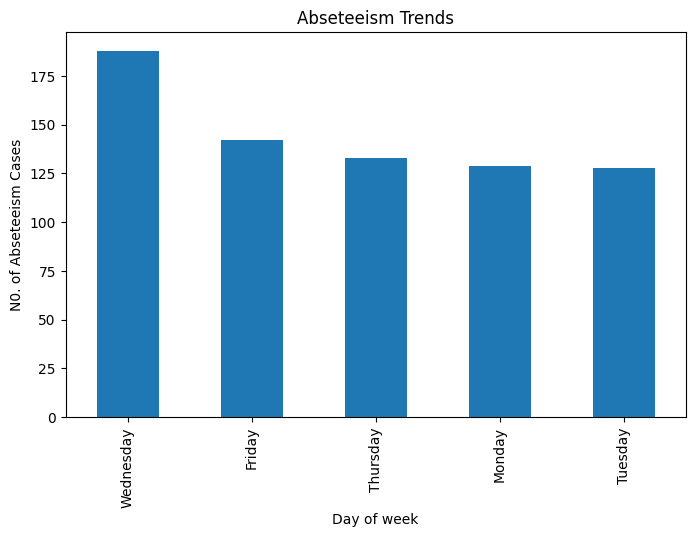

In [35]:
#Group absenteeism by reason
df_a['day'].value_counts().plot(figsize=(8, 5), kind="bar", ylabel="N0. of Abseteeism Cases",
                                xlabel="Day of week",
                                title="Abseteeism Trends");

In [36]:
#Add Absenteeism per Quarter

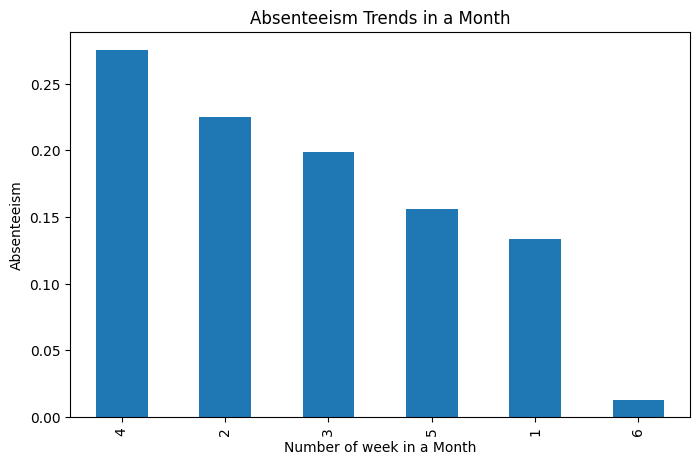

In [37]:
df_a['Week_Numb'].value_counts(normalize=True).plot(figsize=(8, 5), kind="bar",
                                                    ylabel="Absenteeism",
                                                    xlabel="Number of week in a Month",
                                                    title="Absenteeism Trends in a Month");

Since most payweek fall within week 4, it can be expected that there will be a higher number of absenteeism

In [42]:
team_a=df_a['Team'].value_counts()


In [41]:
# # Calculate the count of present and absent employees per team
# team= df_a.groupby(['Team', 'attendance']).size().unstack(fill_value=0)
# #team['Proportion_Absent'] = team['Absent'] / (df['Present'] + df['Absent'])

KeyError: ignored

Some teams have very few members and depending on the model we will pick we can decide to remove the teams with very few members

###Visualise

In [56]:
df_p=df_p.groupby(["date"])["Employee_Id"].count()
df_p.head(10)

date
2023-02-02    15
2023-02-03    15
2023-02-06    15
2023-02-07    16
2023-02-08    16
2023-02-09    16
2023-02-10    15
2023-02-13    15
2023-02-14    15
2023-02-15     4
Name: Employee_Id, dtype: int64

In [57]:
df=df_p.reset_index()
df.set_index('date', inplace = True)
df.rename(columns = {'Employee_Id':'attendance'}, inplace = True)
#df['attendance']=df['Employee_Id']
df.head(5)

,attendance
date,
2023-02-02,15
2023-02-03,15
2023-02-06,15
2023-02-07,16
2023-02-08,16


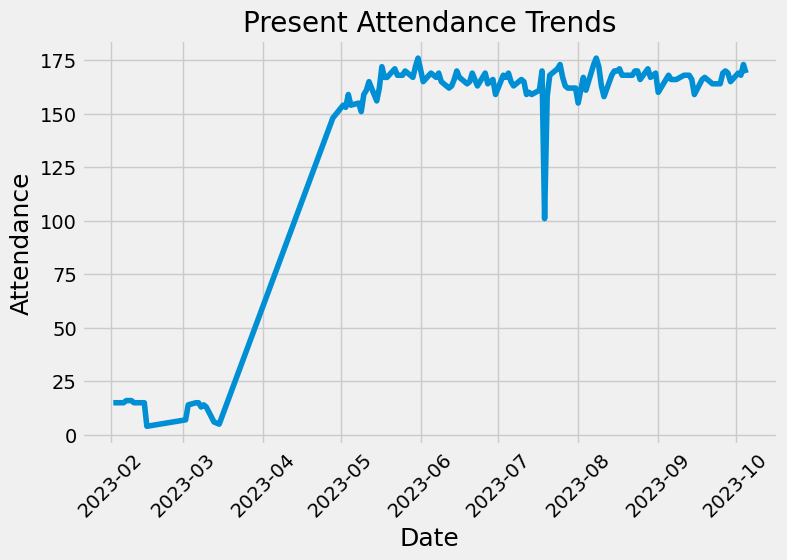

In [58]:
# Visualize the attendance Trends per day
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
plt.title('Present Attendance Trends')

plt.plot(df['attendance'],)

#Label The axis
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Attendance', fontsize=18)

plt.show()

###Check for the Distribution

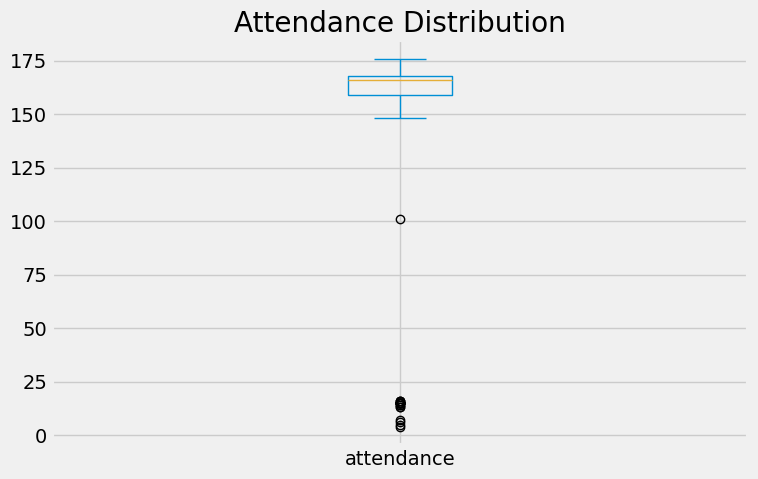

In [59]:
df['attendance'].plot(figsize=(8, 5),kind="box", title="Attendance Distribution" );

In [60]:
out=df[df['attendance']<100]
out.shape

(19, 1)

Check for outliers cause some days have really low attendance to avoid skewing the data.

In [ ]:
#remove the outliers
#df=df[df['attendance']>125]

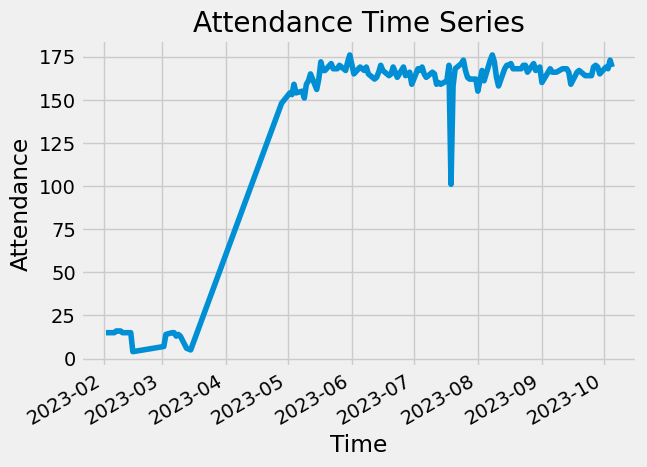

In [61]:
df['attendance'].plot(xlabel='Time', ylabel='Attendance', title='Attendance Time Series');

##Split and Train The Model

In [63]:
import math

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras import Input

In [62]:
df.shape

(131, 1)

###Split Data

In [64]:
#Convert the dataframe to a numpy array
dataset = df.values

#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len

105

In [ ]:
# #Scale the data
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)

# scaled_data[:5]

array([[0.        ],
       [0.21428571],
       [0.17857143],
       [0.39285714],
       [0.21428571]])

In [ ]:
#scaled_data=dataset

####Scale Data

In [65]:
#Create the training data set
#Create the scaled training data set
train_data = dataset[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
#We create a loop
for i in range(5, len(train_data)):
    x_train.append(train_data[i-5:i, 0]) #Will conain 5 values (0-4)
    y_train.append(train_data[i, 0]) #Will contain the 5th value (5)
    if i <= 6:
        print(x_train)
        print(y_train)
        print()

[array([15, 15, 15, 16, 16])]
[16]

[array([15, 15, 15, 16, 16]), array([15, 15, 16, 16, 16])]
[16, 15]



In [66]:
#Convert the x_train and y_train to numpy arrays
## So that they can be used in training the LSTM Model
X_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the x_train data
## Because LSTM expects input to be 3D in terms of (Samples(rows), Features(columns) and Time Steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(100, 5, 1)

In [67]:
##### Step 3 - Specify the structure of a Neural Networks
model = Sequential(name="LSTM-Model")# Model
#model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Input(shape=(X_train.shape[1],X_train.shape[2]), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


##### Step 4 - Compile the model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['MeanSquaredError', 'MeanAbsoluteError'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.

              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 5 - Fit the model on the dataset
history = model.fit(X_train, # input data
                    y_train, # target data
                    batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=1000, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose=0, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.

                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

                    use_multiprocessing=True, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False.
                   )

In [68]:
#Create a new array containing scaled values from index 136 to 169
test_data = dataset[training_data_len - 5:]

#Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(5, len(test_data)):
    x_test.append(test_data[i-5:i, 0])


In [69]:
#Convert the data to a numpy array
X_test = np.array(x_test)

In [70]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [71]:
#Get the model's predicted price values for the x_test data set
predictions = model.predict(X_test)
predictions

1/1 [==============================] - 1s 711ms/step


array([[165.1371 ],
       [165.16669],
       [164.76942],
       [165.06465],
       [165.13405],
       [165.06638],
       [165.06714],
       [165.06686],
       [165.13481],
       [165.13606],
       [165.13673],
       [165.06892],
       [164.69862],
       [165.0633 ],
       [165.1011 ],
       [165.06535],
       [165.02744],
       [164.98326],
       [164.98189],
       [165.16228],
       [165.19171],
       [165.16719],
       [165.03116],
       [165.1655 ],
       [165.13689],
       [165.25912]], dtype=float32)

In [72]:
len(predictions)

26

###Evaluate the Model

In [73]:
#Evaluate model (get the root mean quared error (RMSE))
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1.6160143338716948

<ipython-input-74-66199234e903>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


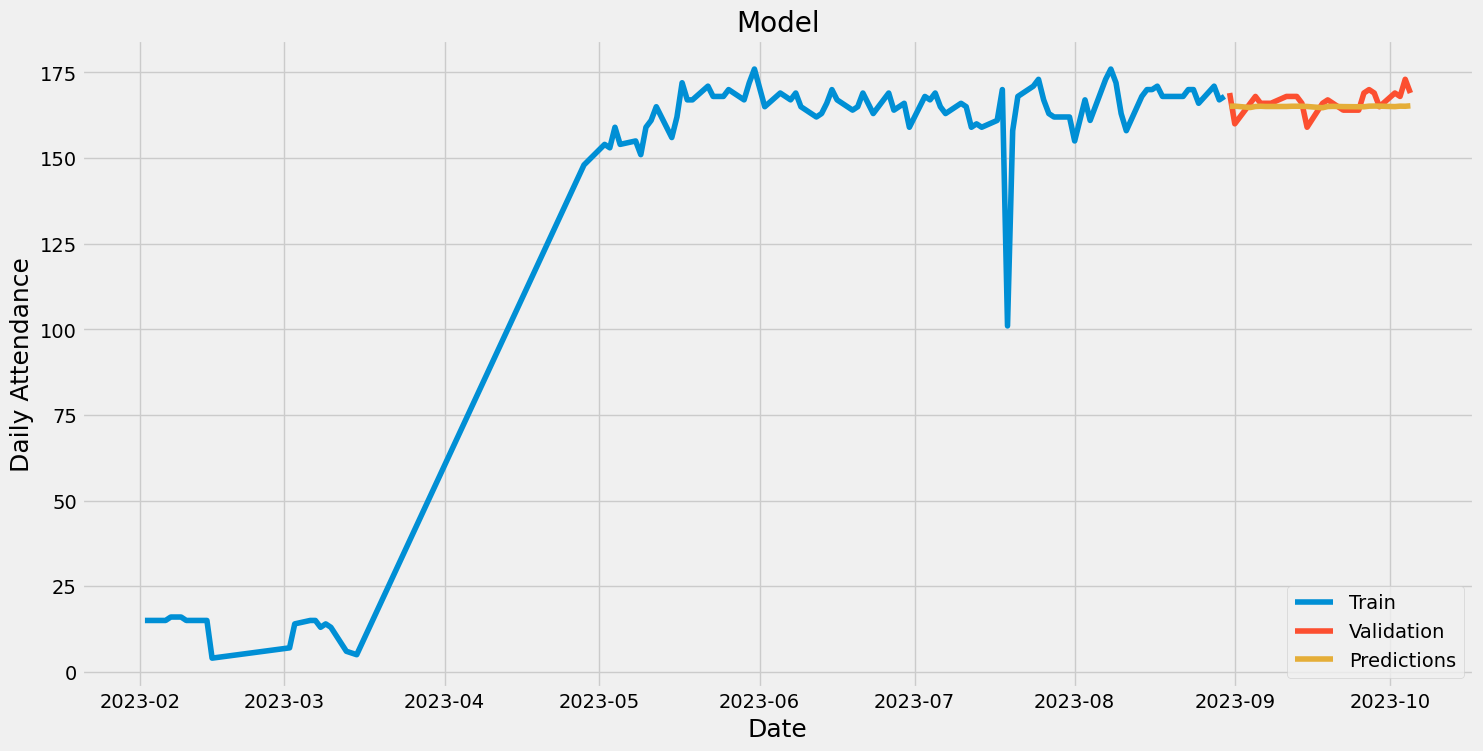

In [74]:
#Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Attendance', fontsize=18)
plt.plot(train['attendance'])
plt.plot(valid[['attendance', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show();

In [77]:
X_FUTURE = 30
predictions = np.array([])
last = X_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
#predictions = scaler.inverse_transform([predictions])[0]
print(predictions[:5])

1/1 [==============================] - 0s 45ms/step
[[165.2591]]
1/1 [==============================] - 0s 42ms/step
[[165.04347]]
1/1 [==============================] - 0s 90ms/step
[[165.03102]]
1/1 [==============================] - 0s 104ms/step
[[165.0285]]
1/1 [==============================] - 0s 88ms/step
[[165.02711]]
1/1 [==============================] - 0s 35ms/step
[[165.02696]]
1/1 [==============================] - 0s 103ms/step
[[165.02695]]
1/1 [==============================] - 0s 53ms/step
[[165.02693]]
1/1 [==============================] - 0s 47ms/step
[[165.02693]]
1/1 [==============================] - 0s 61ms/step
[[165.02693]]
1/1 [==============================] - 0s 44ms/step
[[165.02693]]
1/1 [==============================] - 0s 63ms/step
[[165.02693]]
1/1 [==============================] - 0s 79ms/step
[[165.02693]]
1/1 [==============================] - 0s 114ms/step
[[165.02693]]
1/1 [==============================] - 0s 95ms/step
[[165.02693]]
1/1 [====

In [ ]:
X_FUTURE = 14
predictions = np.array([])
last = X_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
#predictions = scaler.inverse_transform([predictions])[0]
print(predictions)

1/1 [==============================] - 0s 41ms/step
[[167.33134]]
1/1 [==============================] - 0s 38ms/step
[[165.95053]]
1/1 [==============================] - 0s 41ms/step
[[165.46068]]
1/1 [==============================] - 0s 38ms/step
[[165.27623]]
1/1 [==============================] - 0s 46ms/step
[[165.20486]]
1/1 [==============================] - 0s 35ms/step
[[165.17703]]
1/1 [==============================] - 0s 53ms/step
[[165.16612]]
1/1 [==============================] - 0s 40ms/step
[[165.16183]]
1/1 [==============================] - 0s 42ms/step
[[165.16016]]
1/1 [==============================] - 0s 96ms/step
[[165.15953]]
1/1 [==============================] - 0s 71ms/step
[[165.15927]]
1/1 [==============================] - 0s 84ms/step
[[165.15916]]
1/1 [==============================] - 0s 91ms/step
[[165.1591]]
1/1 [==============================] - 0s 50ms/step
[[165.15909]]
[167.3313446  165.95053101 165.4606781  165.27622986 165.2048645
 165.1770324

In [78]:
import datetime
from datetime import timedelta
dicts = []
curr_date = df.index[-1]
for i in range(X_FUTURE):
  curr_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": curr_date})

new_data = pd.DataFrame(dicts).set_index("Date")
new_data

,Predictions
Date,
2023-10-06,165.259094
2023-10-07,165.043472
2023-10-08,165.031021
2023-10-09,165.028503
2023-10-10,165.027115
2023-10-11,165.026962
2023-10-12,165.026947
2023-10-13,165.026932
2023-10-14,165.026932
